<a href="https://colab.research.google.com/github/kaihcodes/retailsales_time_series/blob/main/retailstoresalesanddemandforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://www.kaggle.com/datasets/atomicd/retail-store-inventory-and-demand-forecasting?select=sales_data.csv
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sales_data.csv')

df.info()
df.head(20)

df['Sales'] = df['Price'] * df['Units Sold']

df.head(20)

#no null values
df['Date'].nunique()
df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        760 non-null    datetime64[ns]
 1   Units Sold  760 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.0 KB


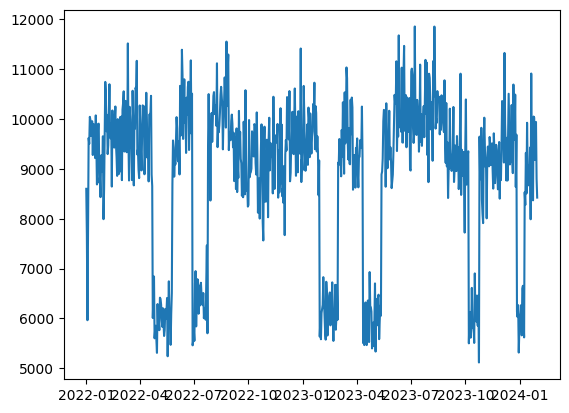

In [3]:
df1 = pd.pivot_table(df,index='Date',values='Units Sold',aggfunc='sum').reset_index()
df1.info()
df1 = df1[(df1['Date'] >= '2022-01-01') & (df1['Date'] < '2025-01-01')]
plt.plot(df1['Date'],df1['Units Sold'])
plt.show()


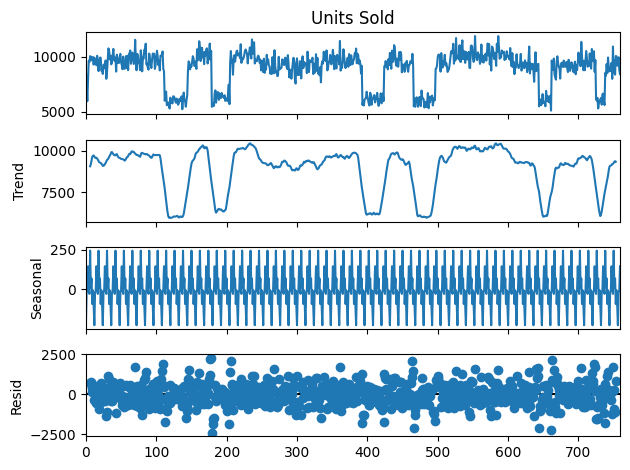

In [4]:
import statsmodels.tsa.seasonal as sd
#decompose to evalute trend, seasonal and residual error variations
df2 = sd.seasonal_decompose(df1['Units Sold'],model = 'additive',period=12)

df2.plot()
plt.tight_layout()


np.float64(0.7398875759812243)

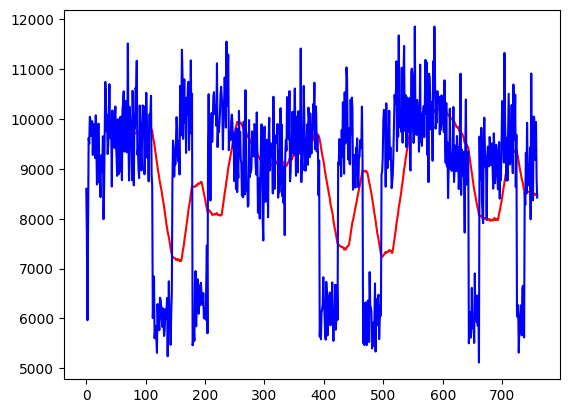

In [12]:
#check for stationarity
import numpy as np
from statsmodels.tsa.stattools import adfuller as adf
adf = adf(df1['Units Sold'],autolag='AIC')
format(adf[1],'.8f') #p value way less than 0.05, implying stationarity. differening may not needed to achieve stationariy

#check for autocorrelation
df1['Units Sold'].autocorr(lag=3)
#as the lags increase, correlation decrease, suggesting in the short term, there is a higher correlation but not in the long term



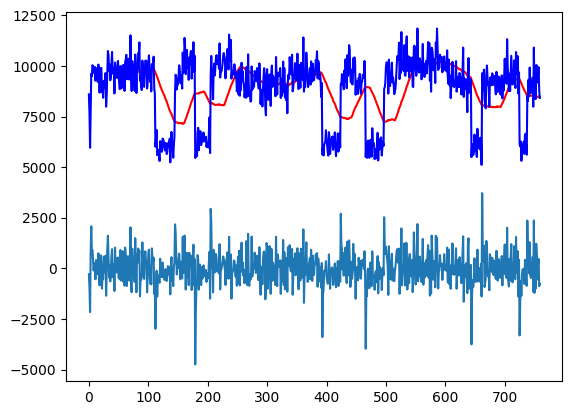

In [24]:
#smoothing
#start with rolling average
df3 = df1['Units Sold'].rolling(50).mean()
plt.plot(df3,color='red')
plt.plot(df1['Units Sold'],color='blue')


#arima
from statsmodels.tsa.arima.model import ARIMA

df4 = ARIMA(df1['Units Sold'],order=(3,0,1))
df4fit = df4.fit()
forecast = df4fit.forecast(steps = 100)

df4fit.summary()
plt.plot(df4fit.resid)

#plt.plot(df1['Units Sold'],color='blue')
#plt.plot(range(len(df1['Units Sold']), len(df1['Units Sold']) + 100), forecast,color='red')